In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('GenData.xlsx')
print(df.head(5))

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1      

In [3]:
df = df.reindex(columns=['name', 'generation', 'type1', 'type2', 'hp', 'attack', 'defense', 'ap_attack', 'sp_defense', 'speed', 'base_total'])
df = df.rename(columns={'ap_attack': 'sp_attack'})
print(df.head())

         name  generation  type1   type2  hp  attack  defense  sp_attack  \
0   Bulbasaur           1  grass  poison  45      49       49        NaN   
1     Ivysaur           1  grass  poison  60      62       63        NaN   
2    Venusaur           1  grass  poison  80     100      123        NaN   
3  Charmander           1   fire     NaN  39      52       43        NaN   
4  Charmeleon           1   fire     NaN  58      64       58        NaN   

   sp_defense  speed  base_total  
0          65     45         318  
1          80     60         405  
2         120     80         625  
3          50     65         309  
4          65     80         405  


In [4]:
df.to_excel('output.xlsx', index=False)


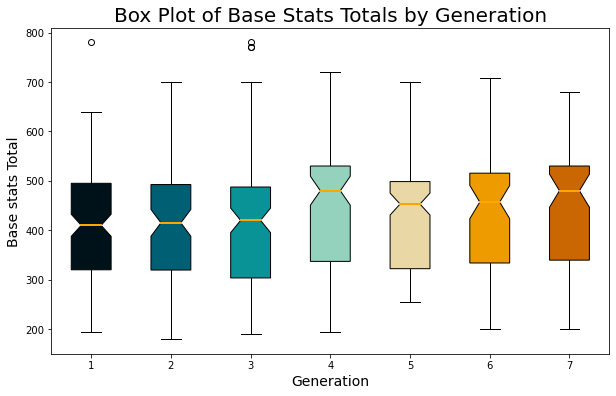

In [5]:
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
plt.figure(figsize=(10, 6))

test = plt.boxplot([df[df['generation']==i]['base_total'] for i in range(1, 8)], patch_artist=True, notch = 'True')

colors = ['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702']
for patch, color in zip(test['boxes'], colors):
    patch.set_facecolor(color)
    
for median in test['medians']:
    median.set(color ='#FFA500',linewidth = 2)


plt.xlabel('Generation', fontsize = 14)
plt.ylabel('Base stats Total', fontsize = 14)
plt.title('Box Plot of Base Stats Totals by Generation', fontsize = 20)


plt.show()

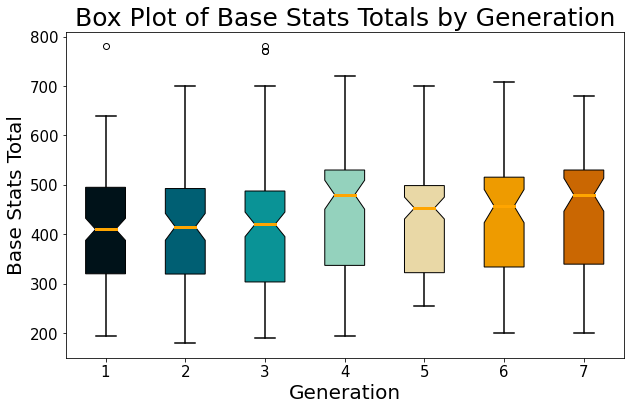

In [6]:
plt.figure(figsize=(10, 6))

test = plt.boxplot([df[df['generation']==i]['base_total'] for i in range(1, 8)], patch_artist=True, notch='True')

colors = ['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702']
labels = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7']

for patch, color in zip(test['boxes'], colors):
    patch.set_facecolor(color)
    
for median in test['medians']:
    median.set(color='#FFA500', linewidth=3)
for cap in test['caps']:
    cap.set(color='black', linewidth=1.5)
for whisker in test['whiskers']:
    whisker.set(color='black', linewidth=1.5, linestyle='-')
for patch, color in zip(test['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Generation', fontsize=20)
plt.ylabel('Base Stats Total', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Box Plot of Base Stats Totals by Generation', fontsize=25)

plt.show()


outliers from Gen 1 is Mewtwo with base total of 780
    Gen3: its Rayquaza 780, Kyogre 770, Groudon 770
        

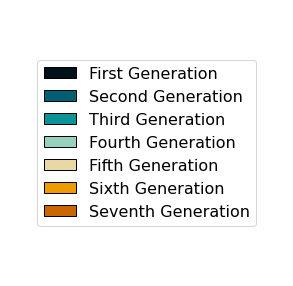

In [7]:
import matplotlib.pyplot as plt

#colors =  ['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702', 'blue']
labels = ['First Generation', 'Second Generation', 'Third Generation', 'Fourth Generation', 
          'Fifth Generation', 'Sixth Generation', 'Seventh Generation', 'Overall Median']



fig, ax = plt.subplots(figsize=(5,5))

ax.plot([],[])
ax.legend(test['boxes'], labels, fontsize=16, loc='center')
ax.axis('off')
plt.show()


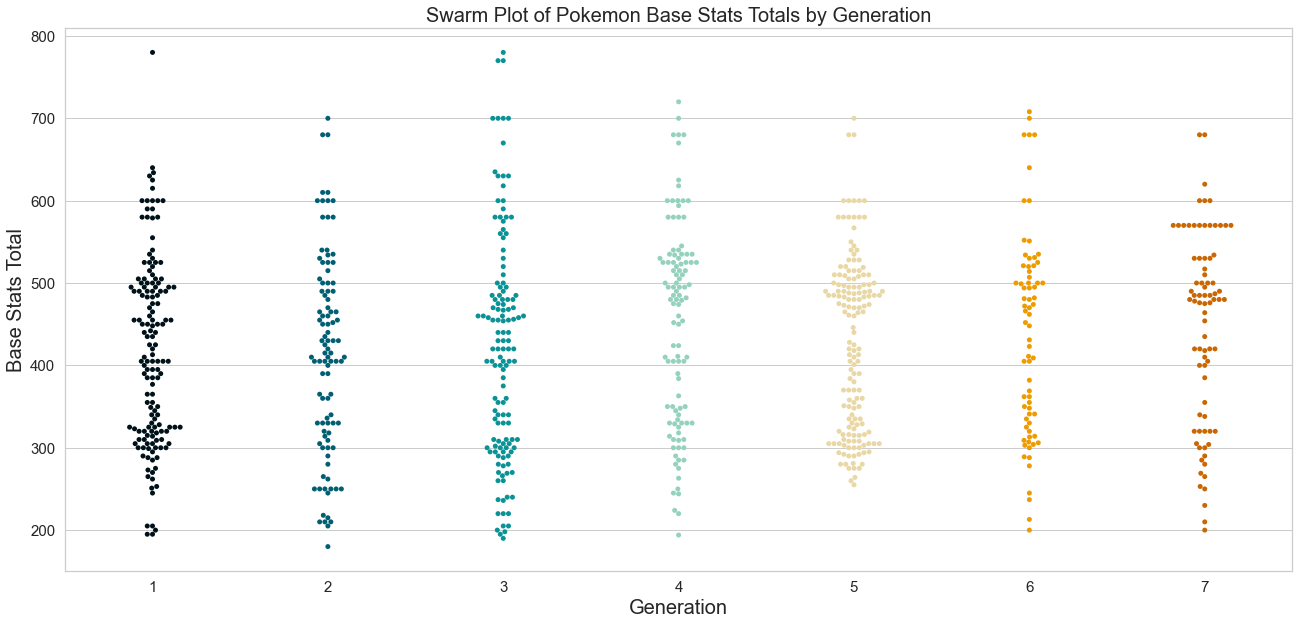

In [8]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(22, 10))

sns.swarmplot(x="generation", y="base_total", data=df, palette=['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702'])

plt.xlabel('Generation', fontsize=20)
plt.ylabel('Base Stats Total', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Swarm Plot of Pokemon Base Stats Totals by Generation', fontsize=20)


plt.show()


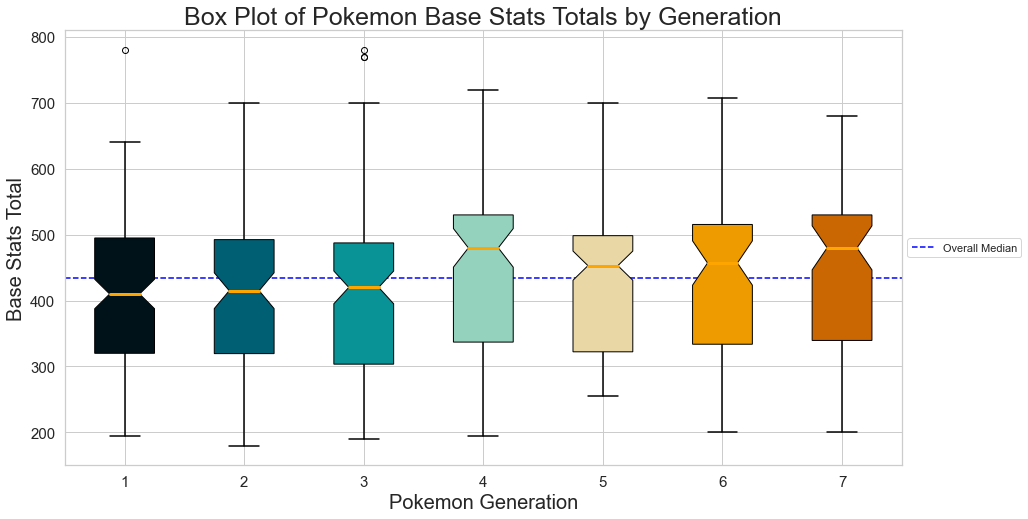

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np





plt.figure(figsize=(15, 8))

test = plt.boxplot([df[df['generation']==i]['base_total'] for i in range(1, 8)], patch_artist=True, notch='True')

colors = ['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702']
labels = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7']

for patch, color in zip(test['boxes'], colors):
    patch.set_facecolor(color)
    
for median in test['medians']:
    median.set(color='#FFA500', linewidth=3)
for cap in test['caps']:
    cap.set(color='black', linewidth=1.5)
for whisker in test['whiskers']:
    whisker.set(color='black', linewidth=1.5, linestyle='-')
for patch, color in zip(test['boxes'], colors):
    patch.set_facecolor(color)


all_data = [df[df['generation']==i]['base_total'] for i in range(1, 8)]
median_all = np.median([item for sublist in all_data for item in sublist])
plt.axhline(median_all, color='blue', linestyle='--', label='Overall Median')

plt.xlabel('Pokemon Generation', fontsize=20)
plt.ylabel('Base Stats Total', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Box Plot of Pokemon Base Stats Totals by Generation', fontsize=25)


plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()



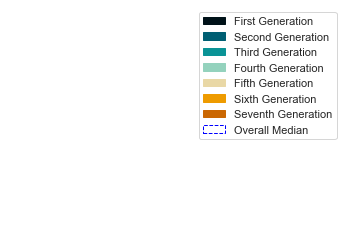

In [14]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats
import numpy as np

plt.rcParams["font.family"] = "sans-serif"
pop_a = mpatches.Patch(color='#001219', label='First Generation')
pop_b = mpatches.Patch(color='#005F73', label='Second Generation')
pop_c = mpatches.Patch(color='#0A9396', label='Third Generation')
pop_d = mpatches.Patch(color='#94D2BD', label='Fourth Generation')
pop_e = mpatches.Patch(color='#E9D8A6', label='Fifth Generation')
pop_f = mpatches.Patch(color='#EE9B00', label='Sixth Generation')
pop_g = mpatches.Patch(color='#CA6702', label='Seventh Generation')
pop_h = mpatches.Patch(facecolor='none', edgecolor='blue', linestyle='--', label='Overall Median')


plt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e,pop_f,pop_g,pop_h])
plt.axis('off')
plt.show()

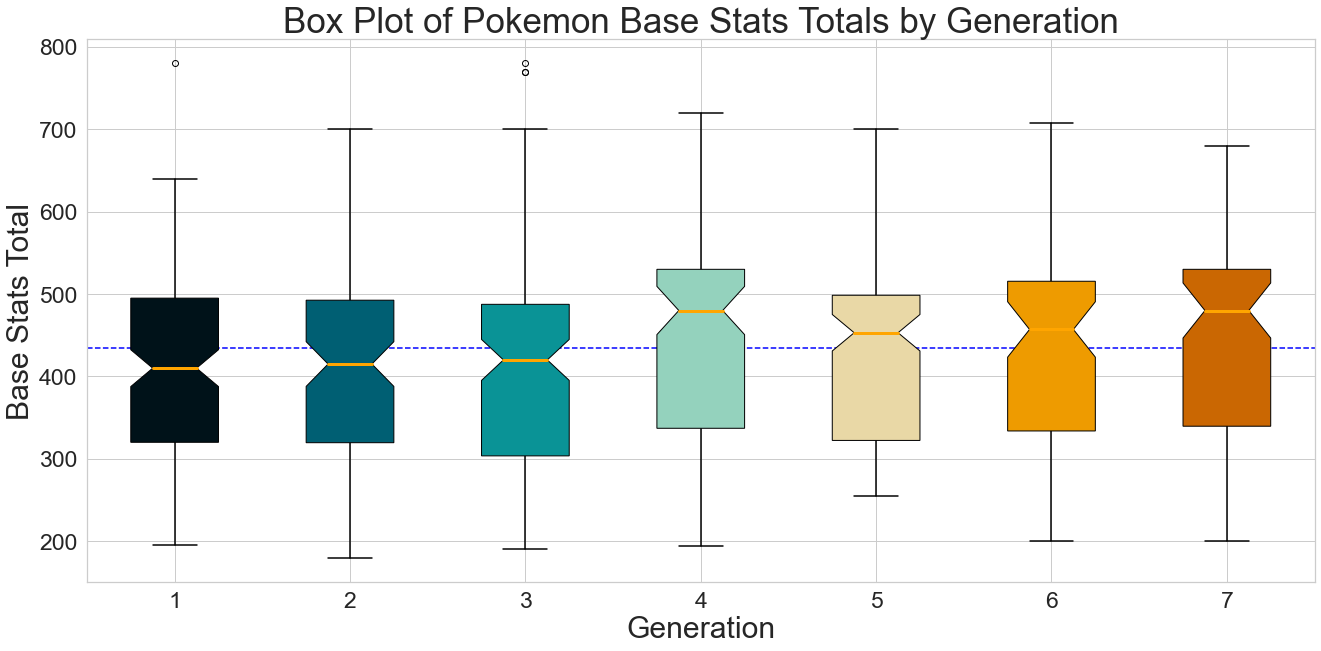

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import scipy.stats

plt.rcParams["font.family"] = "sans-serif"

#2.2 x 1 

plt.figure(figsize=(22, 10))

test = plt.boxplot([df[df['generation']==i]['base_total'] for i in range(1, 8)], patch_artist=True, notch='True')

colors = ['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702']
labels = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7']

for patch, color in zip(test['boxes'], colors):
    patch.set_facecolor(color)
    
for median in test['medians']:
    median.set(color='#FFA500', linewidth=3)
for cap in test['caps']:
    cap.set(color='black', linewidth=1.5)
for whisker in test['whiskers']:
    whisker.set(color='black', linewidth=1.5, linestyle='-')
for patch, color in zip(test['boxes'], colors):
    patch.set_facecolor(color)


all_data = [df[df['generation']==i]['base_total'] for i in range(1, 8)]
median_all = np.median([item for sublist in all_data for item in sublist])
plt.axhline(median_all, color='blue', linestyle='--', label='Overall Median')

plt.xlabel('Generation', fontsize=30)
plt.ylabel('Base Stats Total', fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.title('Box Plot of Pokemon Base Stats Totals by Generation', fontsize=35)

pop_a = mpatches.Patch(color='#001219', label='First Generation')
pop_b = mpatches.Patch(color='#005F73', label='Second Generation')
pop_c = mpatches.Patch(color='#0A9396', label='Third Generation')
pop_d = mpatches.Patch(color='#94D2BD', label='Fourth Generation')
pop_e = mpatches.Patch(color='#E9D8A6', label='Fifth Generation')
pop_f = mpatches.Patch(color='#EE9B00', label='Sixth Generation')
pop_g = mpatches.Patch(color='#CA6702', label='Seventh Generation')
pop_h = mpatches.Patch(facecolor='none', edgecolor='blue', linestyle='--', label='Overall Median')
#lt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e,pop_f,pop_g,pop_h], bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()



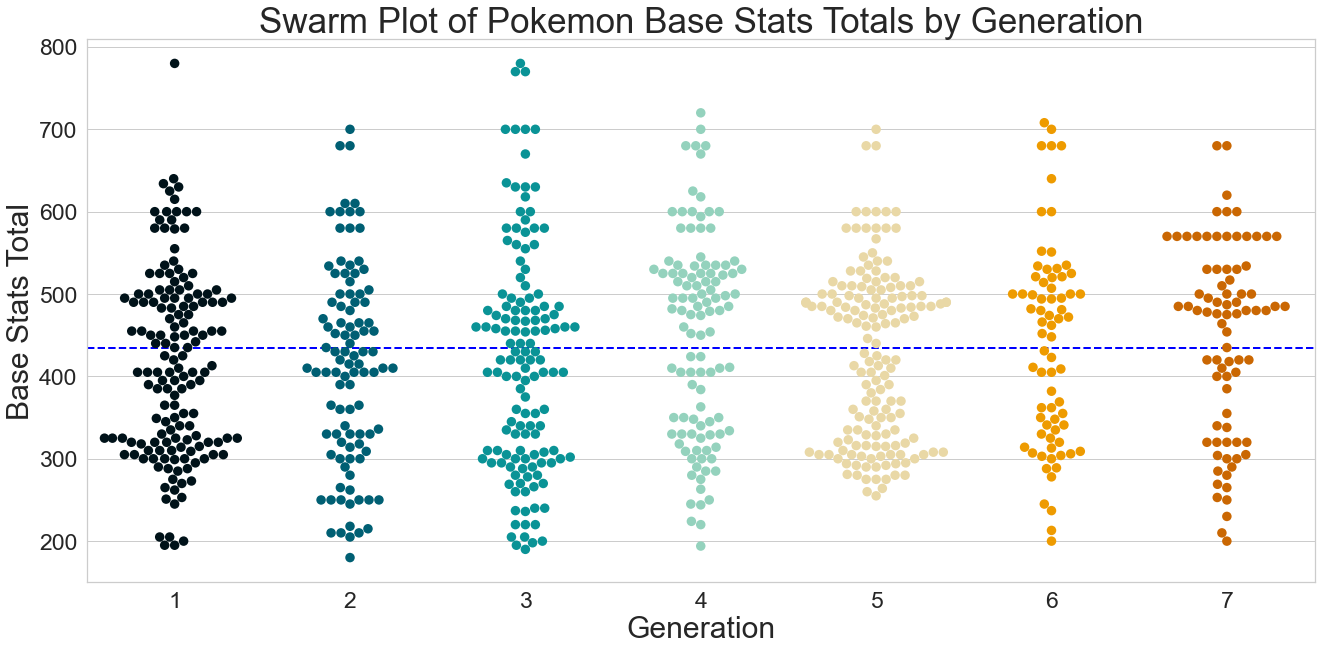

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans-serif"


plt.figure(figsize=(22, 10))

sns.swarmplot(x="generation", y="base_total", data=df, palette=['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702'], size=9.5)


median = df['base_total'].median()
plt.axhline(median, color='blue', linestyle='--', linewidth=2)

plt.xlabel('Generation', fontsize=30)
plt.ylabel('Base Stats Total', fontsize=30)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.title('Swarm Plot of Pokemon Base Stats Totals by Generation', fontsize=35)

plt.show()


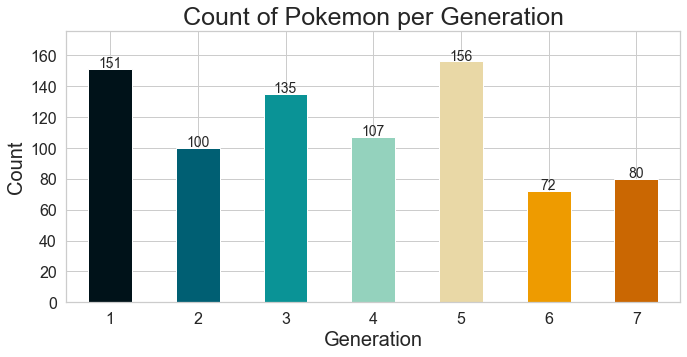

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans-serif"

dfCount = df.groupby('generation').size()


ax = dfCount.plot(kind='bar', color=['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702'], figsize=(11,5))


plt.title('Count of Pokemon per Generation', fontsize = 25)
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16, rotation = 0)
plt.yticks(fontsize=16)


for i, v in enumerate(dfCount):
    ax.text(i, v+1, str(v), ha='center', fontsize=14)

plt.ylim(top=max(dfCount)+20)
plt.show()
